# Clustering-Data has morethan 2 features/coordinates

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Exploring Data

In [3]:
iris_df=pd.read_csv("C:\\Users\\admin\\Dropbox\\DS\\6.building-clustering-models-scikit-learn\\datasets\\iris.csv",skiprows=1,
                   names=['seplength','sepwidth','petlength','petwidth','class'])

In [4]:
iris_df.head()

,seplength,sepwidth,petlength,petwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df=iris_df.sample(frac=1).reset_index(drop=True)

In [6]:
iris_df.head()

,seplength,sepwidth,petlength,petwidth,class
0,5.0,3.2,1.2,0.2,Iris-setosa
1,5.4,3.4,1.7,0.2,Iris-setosa
2,6.6,2.9,4.6,1.3,Iris-versicolor
3,5.3,3.7,1.5,0.2,Iris-setosa
4,6.7,3.3,5.7,2.5,Iris-virginica


In [7]:
iris_df.shape

(150, 5)

In [8]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Preprocessing data

In [9]:
from sklearn import preprocessing
label_encoding=preprocessing.LabelEncoder()
iris_df['class']=label_encoding.fit_transform(iris_df['class'].astype(str))
iris_df.head()

,seplength,sepwidth,petlength,petwidth,class
0,5.0,3.2,1.2,0.2,0
1,5.4,3.4,1.7,0.2,0
2,6.6,2.9,4.6,1.3,1
3,5.3,3.7,1.5,0.2,0
4,6.7,3.3,5.7,2.5,2


# Visualizing data frame into clusters

Text(0, 0.5, 'sepwidth')

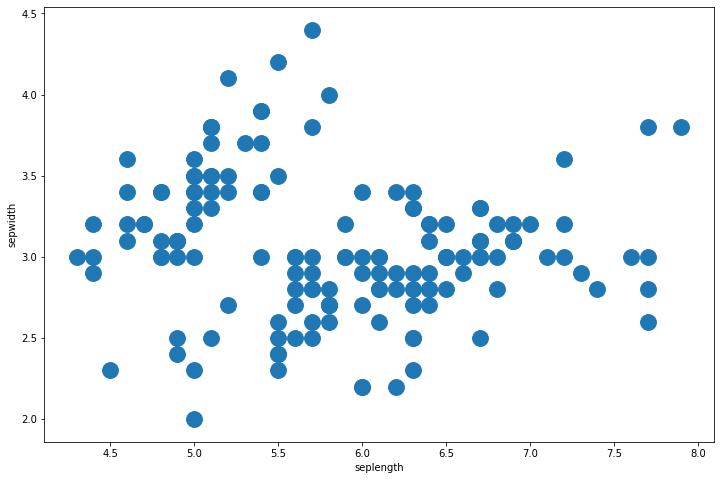

In [10]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(iris_df['seplength'],iris_df['sepwidth'],s=250)
plt.xlabel('seplength')
plt.ylabel('sepwidth')

Text(0, 0.5, 'petlength as y axis coordinate')

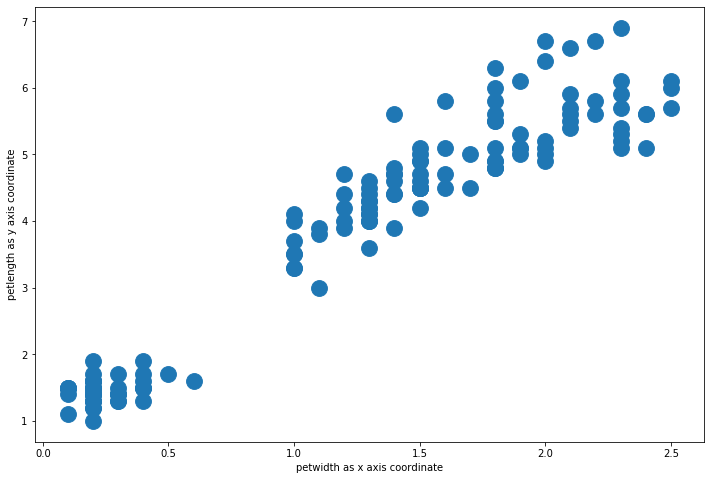

In [11]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(iris_df['petwidth'],iris_df['petlength'],s=250)
plt.xlabel('petwidth as x axis coordinate')
plt.ylabel('petlength as y axis coordinate')

Text(0, 0.5, 'petlength')

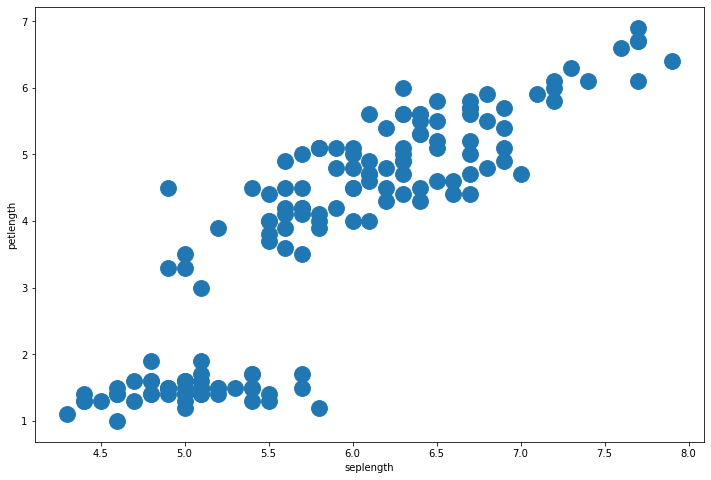

In [12]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(iris_df['seplength'],iris_df['petlength'],s=250)
plt.xlabel('seplength')
plt.ylabel('petlength')

# Perform KMeans Clustering

In [13]:
iris_df_2D=iris_df[['seplength','petlength']]
iris_df_2D.sample(5)

,seplength,petlength
40,5.6,4.1
33,4.9,1.5
38,5.7,1.7
93,4.9,4.5
131,5.5,4.0


In [14]:
iris_df_2D.shape

(150, 2)

In [15]:
iris_df_2D=np.array(iris_df_2D)

# Train KMeans estimator

In [16]:
kmodel=KMeans(n_clusters=3,max_iter=10000)
kmodel.fit(iris_df_2D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
kmodel.labels_

array([0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0,
       0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2])

# Centroids/cluster centers set up ny kmeans object

In [18]:
centroids_2D=kmodel.cluster_centers_
centroids_2D

array([[5.00784314, 1.49411765],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

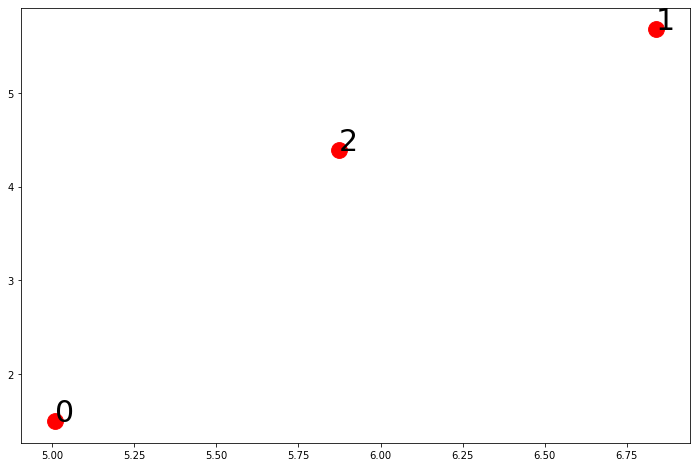

In [19]:
fig,ax=plt.subplots(figsize=(12,8))
#Plot the centroids of 3 clusters(get coordinate points from centroids_2D) using scatter plot centroids[;,0]as x axis,[:,1]as y axis
plt.scatter(centroids_2D[:,0],centroids_2D[:,1],c='red',s=250)

#(Annotate the labels from Kmeans model)Labels generated by kmeans are plotted for centroids of 3 clusters 
for i in range(len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0],centroids_2D[i][1]),fontsize=30)

# Evaluate the performance of clustering using scores

In [20]:
print("Homogeneity score is: ",metrics.homogeneity_score(iris_df['class'],kmodel.labels_))
print("Completeness score is: ",metrics.completeness_score(iris_df['class'],kmodel.labels_))
print("V measure score is: ",metrics.v_measure_score(iris_df['class'],kmodel.labels_))
print("adjusted random score is: ",metrics.adjusted_rand_score(iris_df['class'],kmodel.labels_))
print("adjusted mutual info score is: ",metrics.adjusted_mutual_info_score(iris_df['class'],kmodel.labels_))
print("silhouette score is: ",metrics.silhouette_score(iris_df_2D,kmodel.labels_))

Homogeneity score is:  0.7033177646052958
Completeness score is:  0.7096993707802843
V measure score is:  0.706494157075837
adjusted random score is:  0.6988627672348092
adjusted mutual info score is:  0.6996030957074747
silhouette score is:  0.5890612474062568


# Visualize original data points,original flower category(class/labels),cluster centroid  in single plot

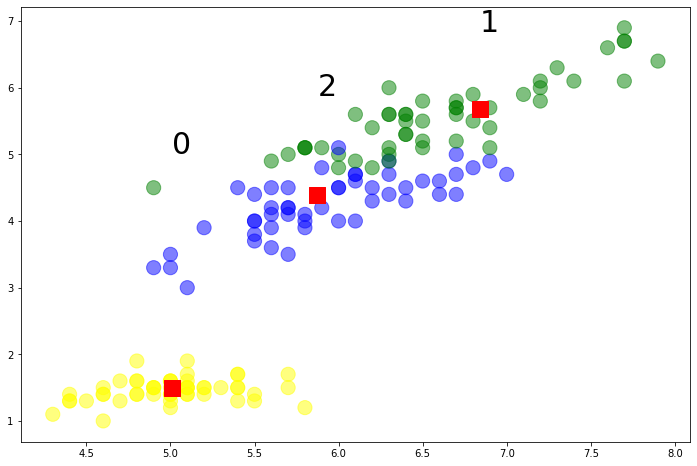

In [21]:
colors=['yellow','blue','green']
plt.figure(figsize=(12,8))

#Plot original data points with above colors,based on iris flower category(iris_df['class']) x axis-seplength,y axis-petlength
plt.scatter(iris_df['seplength'],iris_df['petlength'],c=iris_df['class'],s=200,
           cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)

#Mark the clusters centroid by kmeans with sq red box
plt.scatter(centroids_2D[:,0],centroids_2D[:,1],c='r',s=250,marker='s')

#Annotated scatter plot of centroid associated with predicted labels that kmeans model found
for i in range(len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0],centroids_2D[i][0]),fontsize=30)




# Perform Kmean clustering with all 4 features



# 1. Store only features(4) in iris_features. Drop class column

In [25]:
iris_features=iris_df.drop('class',axis=1)
iris_features.sample(5)

,seplength,sepwidth,petlength,petwidth
141,5.8,2.6,4.0,1.2
116,6.4,2.7,5.3,1.9
106,7.7,3.0,6.1,2.3
23,5.1,3.8,1.6,0.2
28,5.2,3.4,1.4,0.2


# 2.Store class separately in iris_labels 

In [28]:
iris_labels=iris_df['class']
iris_labels.sample(5)

143    0
7      0
39     0
13     1
70     2
Name: class, dtype: int32

# 3.Train KMeans Estimator

In [29]:
kmodel=KMeans(n_clusters=3,max_iter=10000)
kmodel.fit(iris_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# 4.O/P Result Label from KMean

In [37]:
train_labels=kmodel.labels_
train_labels

array([0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1])

# 5.Cluster centers/centroids

In [34]:
kmodel.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# 6.Evaluate the performance of clustering using scores

In [38]:
print("Homogeneity score is: ",metrics.homogeneity_score(iris_labels,train_labels))
print("completeness score is: ",metrics.completeness_score(iris_labels,train_labels))
print("V measure score is: ",metrics.v_measure_score(iris_labels,train_labels))
print("Adjusted random score is: ",metrics.adjusted_rand_score(iris_labels,train_labels))
print("Adjusted mutual info is: ",metrics.adjusted_mutual_info_score(iris_labels,train_labels))
print("silhouette score is: ",metrics.silhouette_score(iris_features,train_labels))

Homogeneity score is:  0.7514854021988338
completeness score is:  0.7649861514489815
V measure score is:  0.7581756800057784
Adjusted random score is:  0.7302382722834697
Adjusted mutual info is:  0.7483723933229484
silhouette score is:  0.5525919445499755
